<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


### Tarea 1: Familiarizarse con el conjunto de datos

In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### Tarea 2: Generar estadísticas descriptivas y visualizaciones

#### Gráfico # 1

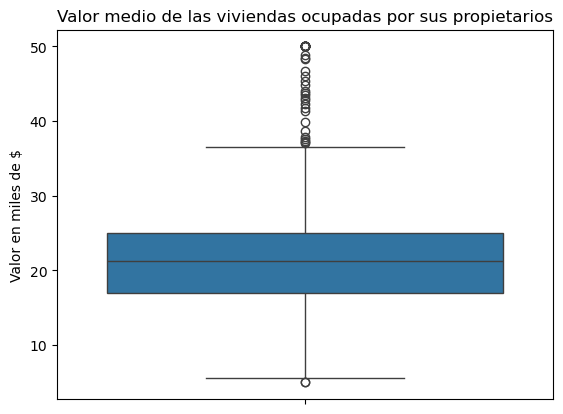

In [7]:
ax = sns.boxplot(y='MEDV', data=boston_df)
ax.set_title('Valor medio de las viviendas ocupadas por sus propietarios')
ax.set_ylabel('Valor en miles de $')
plt.show()

**Explicación Gráfico #1**: El mercado de viviendas en Boston muestra que la mayoría de las propiedades tiene un valor medio concentrado entre 17.000 y 25.000 dólares, con una mediana aproximadamente de 21.000 dólares. Sin embargo, se observan bastantes valores atípicos (outliers) por encima de los 36.000 dólares. También aparece un valor atípico por debajo de los 10.000 dólares, lo que indica la existencia de viviendas de bajo costo dentro del conjunto.

#### Gráfico # 2

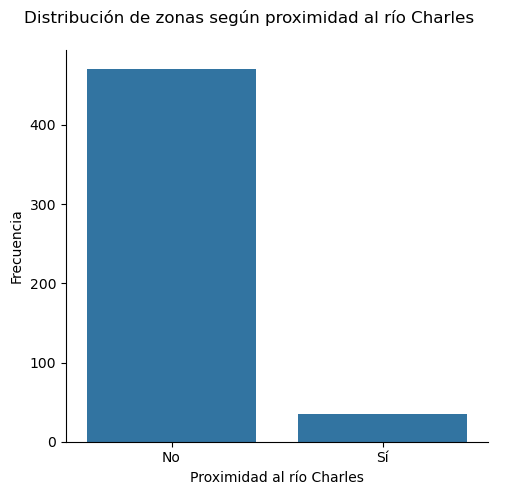

In [8]:
ax = sns.catplot(x='CHAS', kind='count', data=boston_df)
ax.fig.suptitle('Distribución de zonas según proximidad al río Charles')
ax.fig.subplots_adjust(top=0.9)
ax.set_axis_labels("Proximidad al río Charles", "Frecuencia")
ax.set_xticklabels(["No", "Sí"])
plt.show()

**Explicación Gráfico #2**: La mayoría de las viviendas del dataset de Boston no se encuentran cercanas al río Charles, mientras que solo una pequeña proporción sí lo está. Esto muestra que la variable está fuertemente desbalanceada hacia la categoría “No”, lo que indica un sesgo en la distribución de los datos.

#### Gráfico # 3

In [9]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 años o menos'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'AGE_GROUP'] = 'entre 35 y 70 años'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70 años o más'

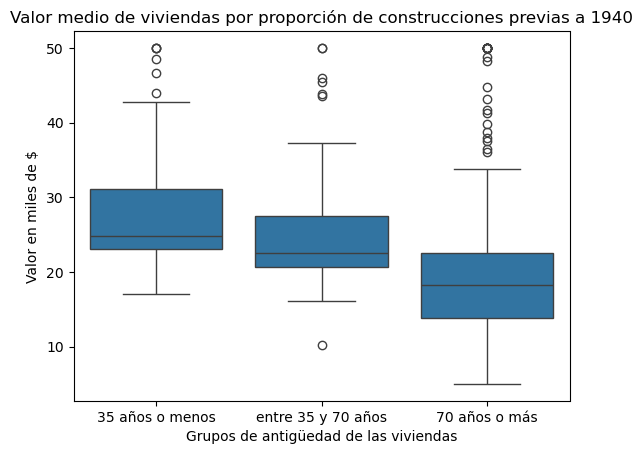

In [10]:
ax = sns.boxplot(y='MEDV', x='AGE_GROUP', data=boston_df, order=['35 años o menos', 'entre 35 y 70 años', '70 años o más'])
ax.set_title('Valor medio de viviendas por proporción de construcciones previas a 1940')
ax.set_xlabel('Grupos de antigüedad de las viviendas')
ax.set_ylabel('Valor en miles de $')
plt.show()

**Explicación Gráfico #3**: El gráfico muestra que, a menor proporción de viviendas antiguas (zonas más nuevas), mayor es el valor medio de las viviendas. Las zonas con construcciones más recientes (≤ 35 años) presentan las medianas más altas, mientras que las zonas con viviendas más antiguas (≥ 70 años) tienen las medianas más bajas. Esta disminución es progresiva a medida que aumenta la antigüedad. Sin embargo, incluso en las zonas antiguas, se observan outliers con precios altos, lo que indica que existen excepciones dentro de la tendencia general.

#### Gráfico # 4

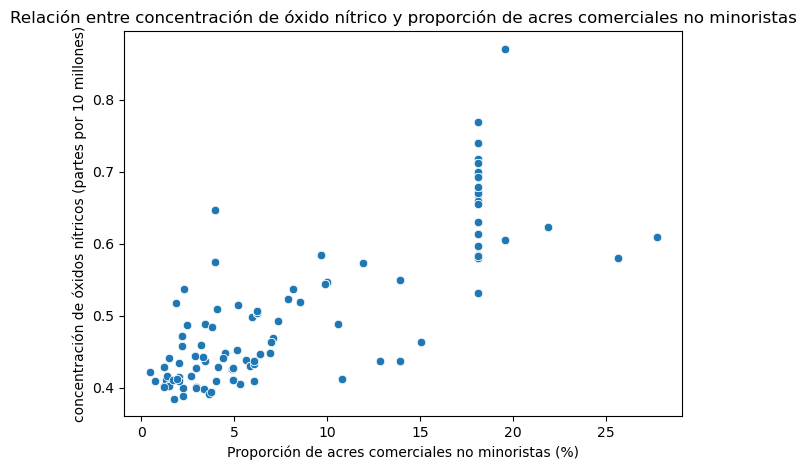

In [11]:
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
ax.set_title('Relación entre concentración de óxido nítrico y proporción de acres comerciales no minoristas')
ax.set_xlabel('Proporción de acres comerciales no minoristas (%)')
ax.set_ylabel('concentración de óxidos nítricos (partes por 10 millones)')
plt.tight_layout()
plt.show()

**Explicación Gráfico #4**: El gráfico muestra una relación positiva entre la proporción de acres comerciales no minoristas y la concentración de óxidos nítricos (NOx). En general, las zonas con mayor presencia de este tipo de comercios tienden a registrar niveles más altos de contaminación atmosférica. Sin embargo, la relación no es perfectamente lineal, ya que existe cierta dispersión en los datos y concentraciones específicas en determinados niveles de uso comercial.

#### Gráfico # 5

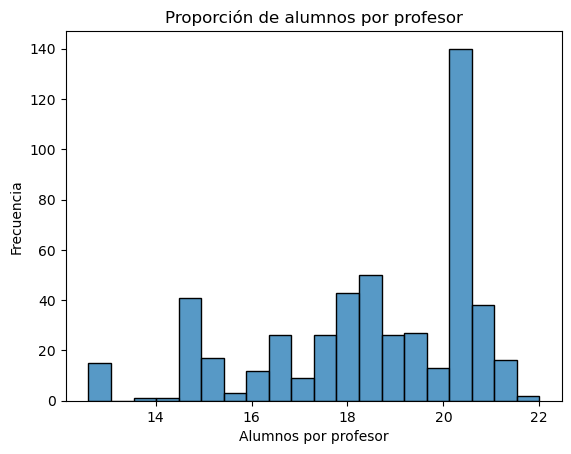

In [12]:
ax = sns.histplot(x='PTRATIO', bins=20, data=boston_df)
ax.set_title('Proporción de alumnos por profesor')
ax.set_xlabel('Alumnos por profesor')
ax.set_ylabel('Frecuencia')
plt.show()

**Explicación Gráfico #5**: El histograma muestra que la mayoría de las localidades presentan un ratio de alumnos por profesor entre 18 y 21. El valor más frecuente en la muestra es 20 alumnos por profesor, lo que representa el pico más alto de la distribución. Aunque existen localidades con valores más bajos (13–17) o más altos (21–22), estas son menos comunes. En general, la distribución está concentrada alrededor de 20, con ligera asimetría hacia la izquierda.

### Tarea 3: Utilice las pruebas adecuadas para responder a las preguntas que se le plantean

#### **Pregunta 1**: ¿Existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles o no?

Graficamos la variable dependiente con un histograma para verificar que tenga una distribución normal:

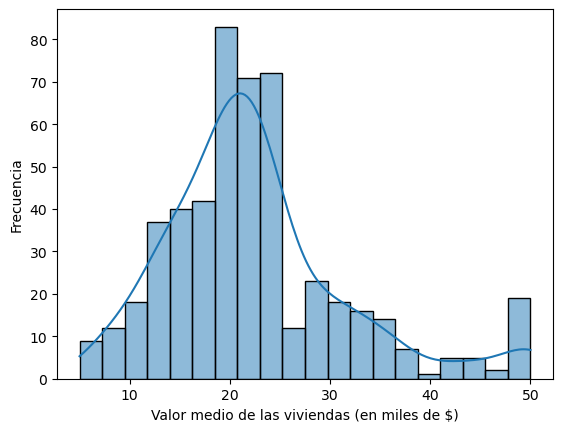

In [13]:
ax = sns.histplot(boston_df['MEDV'], bins=20, kde=True)
ax.set(xlabel='Valor medio de las viviendas (en miles de $)', ylabel='Frecuencia')
plt.show()

Establecemos la **hipotesis**:

H₀: μ₁ = μ₂ -> No existe diferencia en el valor medio de las viviendas delimitadas por el río Charles.

H₁: μ₁ ≠ μ₂ -> Sí existe diferencia en el valor medio de las viviendas delimitadas por el río Charles.

In [14]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

LeveneResult(statistic=np.float64(8.75190489604598), pvalue=np.float64(0.003238119367639829))

Dado que el p-value es menor que 0.05, se rechaza la hipótesis de igualdad de varianzas, por lo que no podemos asumir que las varianzas sean iguales.

In [15]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var=False)

TtestResult(statistic=np.float64(3.113291312794837), pvalue=np.float64(0.0035671700981375174), df=np.float64(36.876408797611994))

**Conclusión:** Dado que el p-value es menor que el nivel de significancia (α = 0.05), se rechaza la hipótesis nula. Esto indica que existe evidencia estadísticamente significativa de que el valor medio de las viviendas es diferente entre las zonas delimitadas por el río Charles y aquellas que no lo están.

#### **Pregunta 2**: ¿Existe alguna diferencia en los valores medios de las casas (MEDV) para cada proporción de unidades ocupadas por sus propietarios construidas antes de 1940 (AGE)?

Separamos los tres grupos de muestras para los valores medios de las casas

In [16]:
menores_de_35 = boston_df[boston_df['AGE_GROUP'] == '35 años o menos']['MEDV']
entre_35_y_70 = boston_df[boston_df['AGE_GROUP'] == 'entre 35 y 70 años']['MEDV']
mayores_de_70 = boston_df[boston_df['AGE_GROUP'] == '70 años o más']['MEDV']

Establecemos la **hipotesis**:

H₀: μ₁ = μ₂ = μ₃ -> Las tres medias poblacionales son iguales.

H₁: μ₁ ≠ μ₂ -> Al menos una de las medias es diferente.


Realizamos una prueba de igualdad de varianzas

In [17]:
scipy.stats.levene(menores_de_35, entre_35_y_70, mayores_de_70, center='mean')

LeveneResult(statistic=np.float64(2.7806200293748304), pvalue=np.float64(0.06295337343259205))

Dado que el valor-p es mayor que 0.05 podemos asumir igualdad de varianzas.

In [18]:
f_statistic, p_value = scipy.stats.f_oneway(menores_de_35, entre_35_y_70, mayores_de_70)
print(f'F-Statistic: {f_statistic}, P-Value: {p_value}')

F-Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusión:** Dado que el p-value es menor que el nivel de significancia (α = 0.05), nos lleva a rechazar la hipótesis nula de igualdad de medias. En consecuencia, concluimos que al menos uno de los tres grupos de edad presenta una media de valores medios de casas significativamente diferente respecto a los demás.

#### **Pregunta 3**: ¿Podemos concluir que no existe relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad?

Establecemos la **hipotesis**:

H₀: ρ = 0 -> No hay una correlación de las concentraciones óxido nítrico con resecto a la proporción de acres comerciales no minoristas por ciudad.

H₁: ρ ≠ 0 -> Hay una correlación de las concentraciones óxido nítrico con resecto a la proporción de acres comerciales no minoristas por ciudad.

In [19]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=np.float64(0.763651446920915), pvalue=np.float64(7.913361061241167e-98))

**Conclusión:** Dado que el valor p es mucho menor que el nivel de significancia (α = 0.05), rechazamos la hipótesis nula y concluimos que existe una correlación significativa entre la proporción de acres comerciales no minoristas y la concentración de óxidos nítricos. Además, el coeficiente de correlación de Pearson (r = 0.76) indica que la relación es positiva y de fuerte magnitud: a mayor proporción de acres comerciales no minoristas, mayor concentración de óxidos nítricos en la ciudad.

#### **Pregunta 4**: ¿Cuál es el impacto de una distancia ponderada adicional a los cinco centros de empleo de Boston sobre el valor medio de las viviendas ocupadas por sus propietarios?

Establecemos la **hipotesis**:

H₀: B = 0 -> La distancia ponderada adicional a los cinco centros de empleo de Boston no tiene relación significativa con el valor medio de las viviendas ocupadas por sus propietarios.

H₁: B ≠ 0 La distancia ponderada adicional a los cinco centros de empleo de Boston sí tiene una relación significativa con el valor medio de las viviendas ocupadas por sus propietarios.

In [20]:
x = boston_df['DIS']
y= boston_df['MEDV']

x = sm.add_constant(x) 

model = sm.OLS(y, x).fit()
predictios = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 31 Aug 2025   Prob (F-statistic):           1.21e-08
Time:                        21:29:17   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusión:** Dado que el p-valor < 0.05, se rechaza la hipótesis nula (H₀) y se concluye que existe una relación lineal significativa entre la distancia ponderada a los cinco centros de empleo de Boston y el valor medio de las viviendas ocupadas por sus propietarios.

El coeficiente estimado (β₁ = 1.09) indica que, en promedio, por cada unidad adicional de distancia a los centros de empleo, el valor medio de las viviendas aumenta en 1.09 unidades.

No obstante, el R² = 0.062 revela que este modelo explica solamente el 6.2% de la variabilidad en los precios de las viviendas, por lo que la relación, aunque significativa, no es muy fuerte.

## Wilman Alzate